# **Inference_yolo_OBB_to_cvat**

In [8]:
model_path = r"C:\Users\CorneAI\YOLOv11_OBB\models\yolo11n_obb_1-295_1to139.pt"
image_parent_path = r"C:\Users\CorneAI\YOLOv11_OBB\eyelid_image\1-295_periocular\images"

# すでにアノーテーションされているラベルは変えずに、その次の画像から推論を行う
# CVATの仕様上、2より12や134が優先されることに留意
start_id = 501 #まだinferenceされていない最初のID (xmlから確認)
end_id = 1000 #Inferenceしたい最後のID（xmlから確認）

# すでにアノーテーションされているxmlファイルのパス
orig_xml_path = r"C:\Users\CorneAI\YOLOv11_OBB\eyelid_image\1-295_periocular\1-295obb_1to139_cvat.xml"

# 推論を行ったxmlファイルのパス（すでに行われているアノーテーションは変えない）
output_xml_path = r"C:\Users\CorneAI\YOLOv11_OBB\eyelid_image\1-295_periocular\1-295obb_139to160_cvat.xml"
output_temp_label_dir = r"C:\Users\CorneAI\YOLOv11_OBB\eyelid_image\1-295_periocular\temp_labels"

In [9]:
import xml.etree.ElementTree as ET
import os

image_paths = []
try:
    # XMLファイルを解析
    tree = ET.parse(orig_xml_path)
    root = tree.getroot()

    # <image> タグをすべて検索
    for image_tag in root.findall('.//image'): # .//image でネストされたタグも検索
        image_id_str = image_tag.get('id')
        name = image_tag.get('name')

        if image_id_str is None:
            print(f"警告: 'id' 属性が見つからない画像タグがあります。")
            continue
        if name is None:
            print(f"警告: ID {image_id_str} の画像タグに 'name' 属性が見つかりません。")
            continue

        try:
            image_id = int(image_id_str)
            # IDが指定された範囲内にあるか確認
            if start_id <= image_id <= end_id:
                # ここではXML内のパスをそのままリストに追加します。
                # 必要に応じて、ベースディレクトリと結合して絶対パスにしてください。
                # 例: base_image_dir = os.path.dirname(orig_xml_path) # または適切な画像ディレクトリ
                #    full_path = os.path.join(base_image_dir, name)
                #    image_paths.append(full_path)
                image_paths.append(name)
        except ValueError:
            print(f"警告: ID '{image_id_str}' を整数に変換できません。スキップします。")
            continue

    print(f"XMLファイルから ID {start_id} から {end_id} の範囲で {len(image_paths)} 個の画像パスを読み込みました。")
    print("最初の5件:", image_paths[:5]) # 確認用
    print("最後の5件:", image_paths[-5:]) # 確認用


except FileNotFoundError:
    print(f"エラー: XMLファイルが見つかりません: {orig_xml_path}")
except ET.ParseError:
    print(f"エラー: XMLファイルの解析に失敗しました: {orig_xml_path}")
except Exception as e:
    print(f"予期せぬエラーが発生しました: {e}")

# image_paths リストが作成されました。
# このリストは、XMLファイルに記載されている画像のうち、指定されたID範囲内の画像パス（または名前）を含みます。


XMLファイルから ID 501 から 1000 の範囲で 500 個の画像パスを読み込みました。
最初の5件: ['14-20190604-77-111937_9391b3f869f19372da08665560d681a75a00a0808d6dfa7231bd7038216a968a_L.jpg', '14-20190604-77-111937_9391b3f869f19372da08665560d681a75a00a0808d6dfa7231bd7038216a968a_R.jpg', '14-20190613-77-151229_06cabbaf8542ce06f9ff051a4876424ee59010556d22ff251a66988ab08ac2e2_L.jpg', '14-20190613-77-151229_06cabbaf8542ce06f9ff051a4876424ee59010556d22ff251a66988ab08ac2e2_R.jpg', '14-20190613-77-151229_d212e16e23d9b4892b51272d659d75dd3b00f4da25246cc83626fb40b2322923_R.jpg']
最後の5件: ['160-20150729-3-111133_fb627ae6fa6f7e295620dff98889192e0dc82967f43c460c6e60330a3742a326_R.jpg', '160-20160727-4-112519_35047c79168e184347d1b79e12dbc6fdeb5c68889559c2f71c8a1ce3e082ad4b_L.jpg', '160-20160727-4-112519_35047c79168e184347d1b79e12dbc6fdeb5c68889559c2f71c8a1ce3e082ad4b_R.jpg', '160-20160727-4-112519_3ab35ca5a4f47fe49bb7ad4eac7aadef2952a3b64a3f8196083f98c3ba6a1434_L.jpg', '160-20160727-4-112519_3ab35ca5a4f47fe49bb7ad4eac7aadef2952a3b64a3f819


image 1/1 C:\Users\CorneAI\YOLOv11_OBB\eyelid_image\1-295_periocular\images\14-20190604-77-111937_9391b3f869f19372da08665560d681a75a00a0808d6dfa7231bd7038216a968a_L.jpg: 640x640 27.1ms
Speed: 4.6ms preprocess, 27.1ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


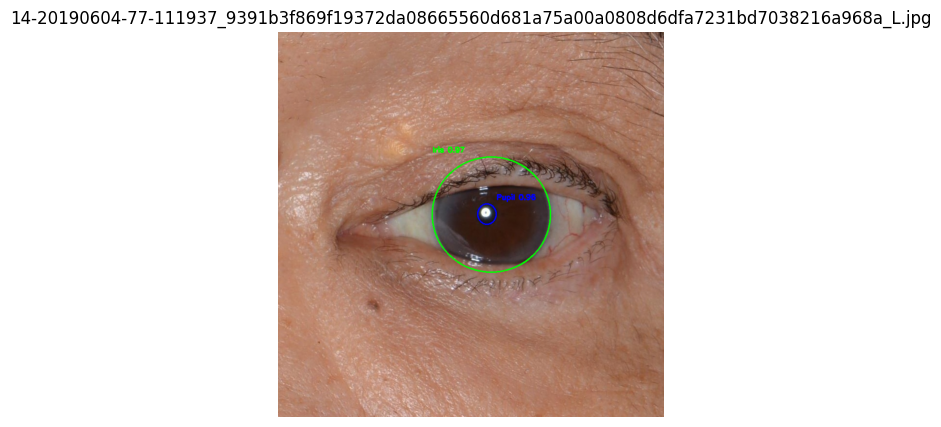


image 1/1 C:\Users\CorneAI\YOLOv11_OBB\eyelid_image\1-295_periocular\images\14-20190604-77-111937_9391b3f869f19372da08665560d681a75a00a0808d6dfa7231bd7038216a968a_R.jpg: 640x640 23.6ms
Speed: 5.3ms preprocess, 23.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


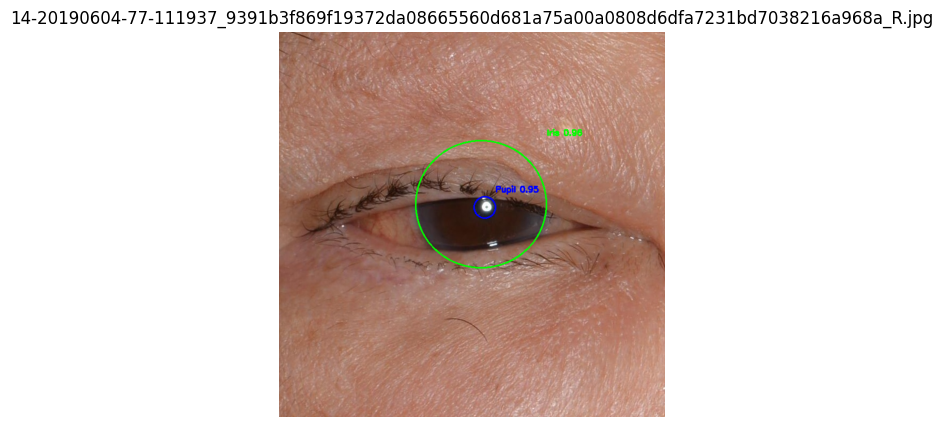


image 1/1 C:\Users\CorneAI\YOLOv11_OBB\eyelid_image\1-295_periocular\images\14-20190613-77-151229_06cabbaf8542ce06f9ff051a4876424ee59010556d22ff251a66988ab08ac2e2_L.jpg: 640x640 23.8ms
Speed: 5.0ms preprocess, 23.8ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


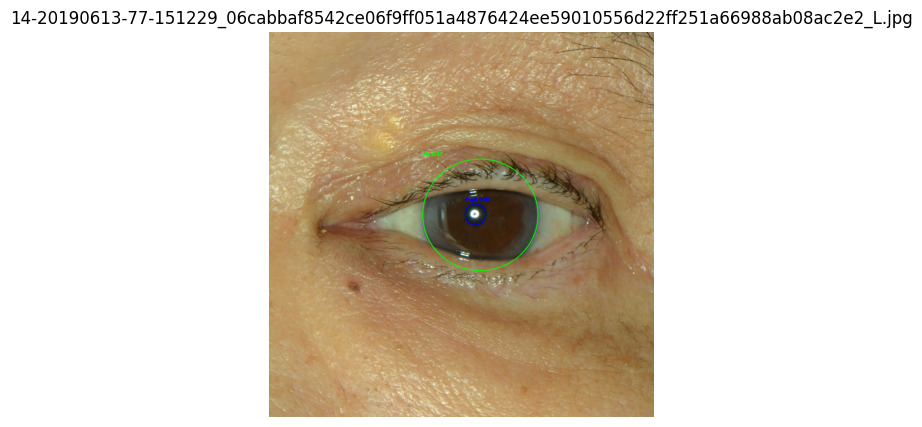


image 1/1 C:\Users\CorneAI\YOLOv11_OBB\eyelid_image\1-295_periocular\images\14-20190613-77-151229_06cabbaf8542ce06f9ff051a4876424ee59010556d22ff251a66988ab08ac2e2_R.jpg: 640x640 23.6ms
Speed: 4.8ms preprocess, 23.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


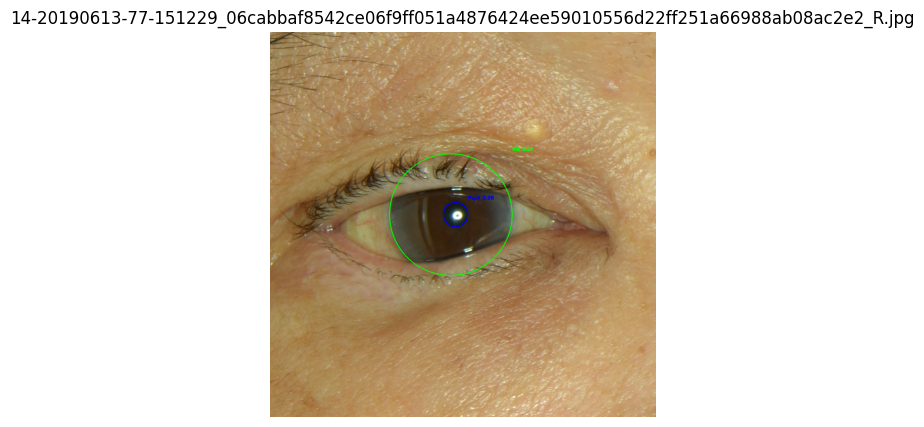


image 1/1 C:\Users\CorneAI\YOLOv11_OBB\eyelid_image\1-295_periocular\images\14-20190613-77-151229_d212e16e23d9b4892b51272d659d75dd3b00f4da25246cc83626fb40b2322923_R.jpg: 640x640 23.5ms
Speed: 5.8ms preprocess, 23.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


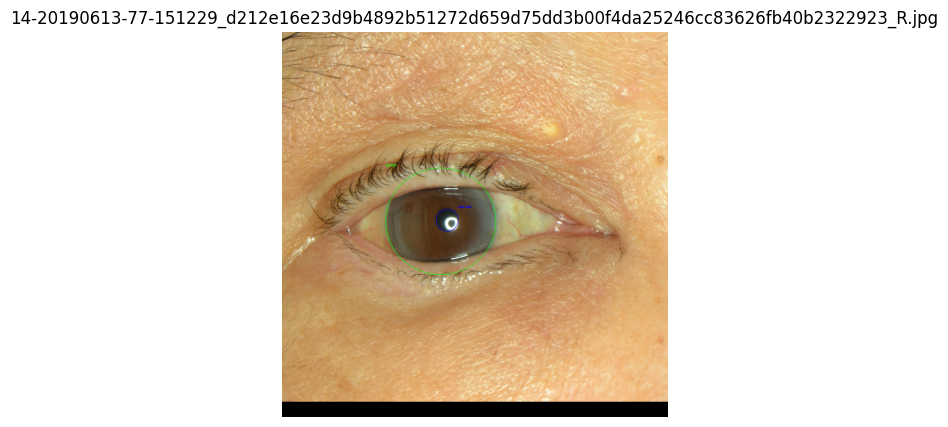

In [12]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import random # 色をランダムに生成する場合（今回は固定リストを使用）

# モデルのロード
model = YOLO(model_path)  # あなたのカスタムモデルのパスを指定

# クラス名を取得
class_names = model.names

# クラスごとの色を定義 (BGR形式)
# 十分な数の異なる色を用意します。
colors = [
    (255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255),
    (255, 0, 255), (192, 192, 192), (128, 128, 128), (128, 0, 0),
    (128, 128, 0), (0, 128, 0), (128, 0, 128), (0, 128, 128), (0, 0, 128),
    (255, 165, 0), (255, 192, 203), (75, 0, 130), (0, 100, 0), (139, 69, 19)
]
num_classes = len(class_names)
# 必要であれば、クラス数に応じてランダムな色を生成することもできます
# if num_classes > len(colors):
#     for _ in range(num_classes - len(colors)):
#         colors.append((random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))
num_colors = len(colors)


# 推論の実行
for image_name in image_paths[0:5]:
    # 画像のフルパスを作成
    image_path = Path(image_parent_path) / image_name

    # 画像の読み込み (BGR形式)
    original_img = cv2.imread(str(image_path))
    if original_img is None:
        print(f"警告: 画像を読み込めませんでした: {image_path}")
        continue

    # 推論実行
    results = model(str(image_path))

    # 検出結果を描画 (BGR画像に対して行う)
    result_img = original_img.copy()
    for result in results:
        # OBBの取得
        for obb in result.obb:
            # 4点の座標
            pts = obb.xyxyxyxy.cpu().numpy().astype(np.int32).reshape(-1, 2)

            # 中心、軸、角度を計算
            center = np.mean(pts, axis=0).astype(int)
            # 軸の長さ計算の安定性を向上させる (隣接する点を使用)
            width = np.linalg.norm(pts[0] - pts[1])
            height = np.linalg.norm(pts[1] - pts[2])
            axes = (int(width / 2), int(height / 2))
            # 角度計算の安定性を向上させる (atan2を使用)
            vec = pts[1] - pts[0]
            angle = np.degrees(np.arctan2(vec[1], vec[0]))

            # クラスIDと色の取得
            cls_id = int(obb.cls.item())
            color = colors[cls_id % num_colors] # クラスIDに応じて色を選択

            # 楕円を描画 (クラスごとの色で)
            cv2.ellipse(result_img, tuple(center), axes, angle, 0, 360, color, 2)

            # クラス名と信頼度
            class_name = class_names[cls_id]
            conf = obb.conf.item()
            label = f"{class_name} {conf:.2f}"

            # ラベルの表示位置を計算 (バウンディングボックスの左上付近)
            # 最もy座標が小さい点（最も上にある点）を探す
            top_point_idx = np.argmin(pts[:, 1])
            text_x = pts[top_point_idx, 0]
            text_y = pts[top_point_idx, 1] - 10 # 点の少し上に表示

            # 画像の上端からはみ出さないように調整
            text_y = max(10, text_y)
            # 画像の左端からはみ出さないように調整 (必要であれば)
            # text_x = max(0, text_x)

            # ラベルの背景を描画（任意）
            (label_width, label_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)
            # cv2.rectangle(result_img, (text_x, text_y + baseline), (text_x + label_width, text_y - label_height), color, cv2.FILLED)

            # ラベルを描画 (クラスごとの色で、計算した位置に)
            cv2.putText(result_img, label, (text_x, text_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2) # 線の色と同じにする

    # 結果を表示 (表示のためにBGRからRGBに変換)
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.title(image_name) # 画像ファイル名を表示
    plt.axis('off')
    plt.show()